<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/TimeSeries/20210531_samydata_hmm_ac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/urban_heat/colabnb/kmlee/

/content/drive/.shortcut-targets-by-id/1kvbRVbtsNfOtjX32jnBD86WXtnpvg0k-/urban_heat/colabnb/kmlee


In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 32.1MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Change xaxis
from sir_utils import *

from hmmlearn import hmm
import scipy.stats as ss

In [ ]:
fpaths = pd.read_csv("/content/drive/MyDrive/urban_heat/colabnb/kmlee/timeseries_samy_data/pg2-all-merged.csv")
fpaths

,timestamp,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,ac10,ac11,ac12,ac13,ac14,ac15,ac16,wall,ac5_glass,air_temperature
0,2020-01-24 00:00:07,29.84,30.32,28.41,28.74,27.71,27.82,28.00,28.29,28.34,28.08,28.11,29.60,32.78,28.07,29.60,28.23,28.39,27.28,26.4
1,2020-01-24 00:00:17,29.85,30.28,28.41,28.97,27.72,27.82,27.98,28.26,28.34,28.07,28.07,29.56,32.78,28.02,29.56,28.22,28.38,27.27,26.4
2,2020-01-24 00:00:27,29.80,30.38,28.34,29.18,27.68,27.74,27.92,28.24,28.31,28.04,28.02,29.53,32.81,27.99,29.53,28.18,28.38,27.25,26.4
3,2020-01-24 00:00:37,29.84,30.39,28.40,29.34,27.71,27.78,27.98,28.26,28.35,28.04,28.09,29.61,32.89,28.02,29.61,28.22,28.38,27.27,26.4
4,2020-01-24 00:00:47,29.72,30.24,28.26,29.25,27.58,27.69,27.87,28.16,28.23,27.92,27.93,29.46,32.78,27.91,29.46,28.13,28.27,27.18,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447658,2020-03-15 23:59:11,35.08,32.80,37.77,33.41,32.98,32.09,31.45,31.47,31.51,34.43,33.50,31.42,37.70,31.27,31.42,33.92,32.18,30.49,27.7
447659,2020-03-15 23:59:21,35.18,32.84,37.79,33.43,32.98,32.04,31.50,31.52,31.54,34.45,33.44,31.45,37.75,31.29,31.45,33.91,32.21,30.55,27.7
447660,2020-03-15 23:59:31,35.16,32.83,37.65,33.44,32.96,31.95,31.47,31.52,31.54,34.43,33.37,31.46,37.78,31.28,31.46,33.88,32.20,30.53,27.7
447661,2020-03-15 23:59:41,35.10,32.71,37.64,33.32,32.81,31.77,31.33,31.38,31.40,34.24,33.11,31.35,37.65,31.16,31.35,33.74,32.10,30.42,27.7


# HMM model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

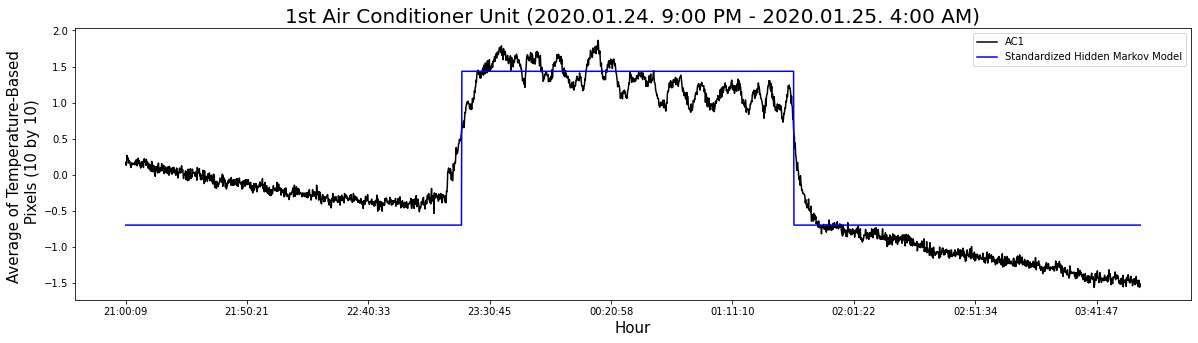

In [ ]:
#@ 2020 Jan 24

# -- set start and end time
st = "2020-01-24 21:00:00" #change
en = "2020-01-25 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.24. 9:00 PM - 2020.01.25. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

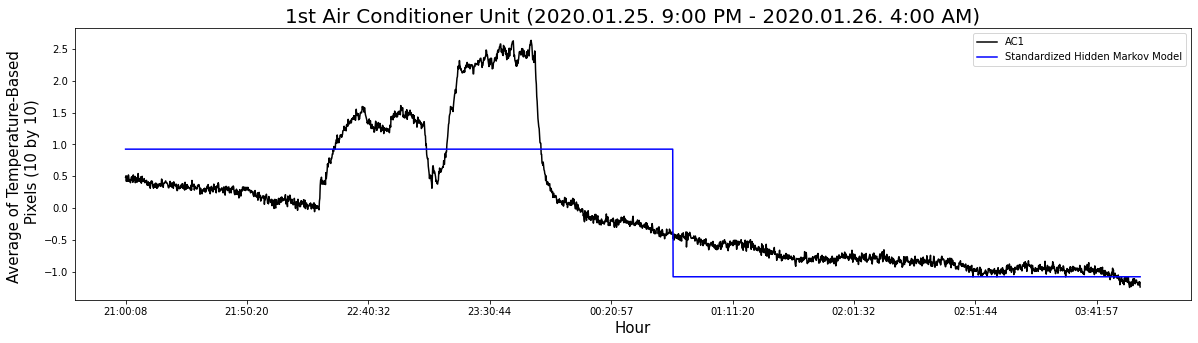

In [ ]:
#@ 2020 Jan 25

# -- set start and end time
st = "2020-01-25 21:00:00" #change
en = "2020-01-26 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.25. 9:00 PM - 2020.01.26. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

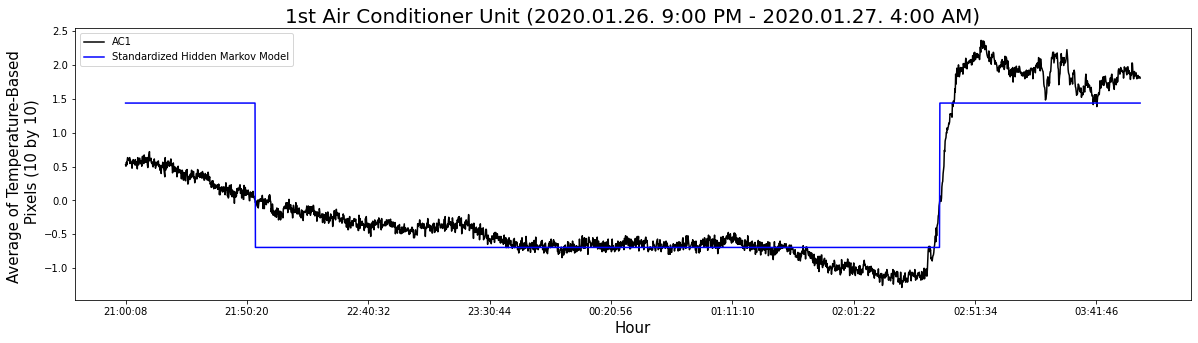

In [ ]:
#@ 2020 Jan 26

# -- set start and end time
st = "2020-01-26 21:00:00" #change
en = "2020-01-27 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.26. 9:00 PM - 2020.01.27. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

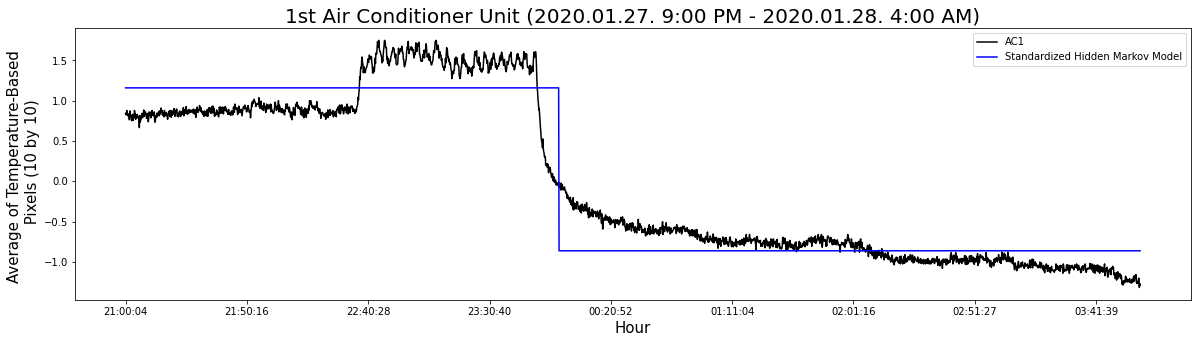

In [ ]:
#@ 2020 Jan 27

# -- set start and end time
st = "2020-01-27 21:00:00" #change
en = "2020-01-28 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.27. 9:00 PM - 2020.01.28. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

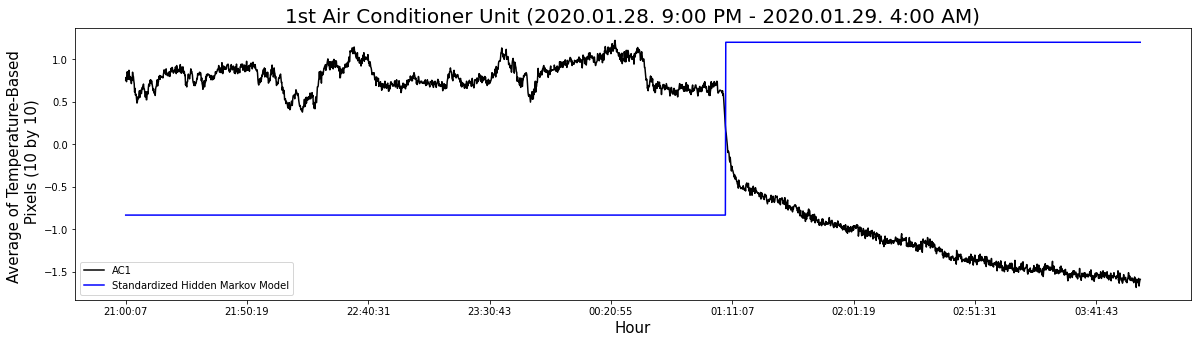

In [ ]:
#@ 2020 Jan 28

# -- set start and end time
st = "2020-01-28 21:00:00" #change
en = "2020-01-29 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.28. 9:00 PM - 2020.01.29. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

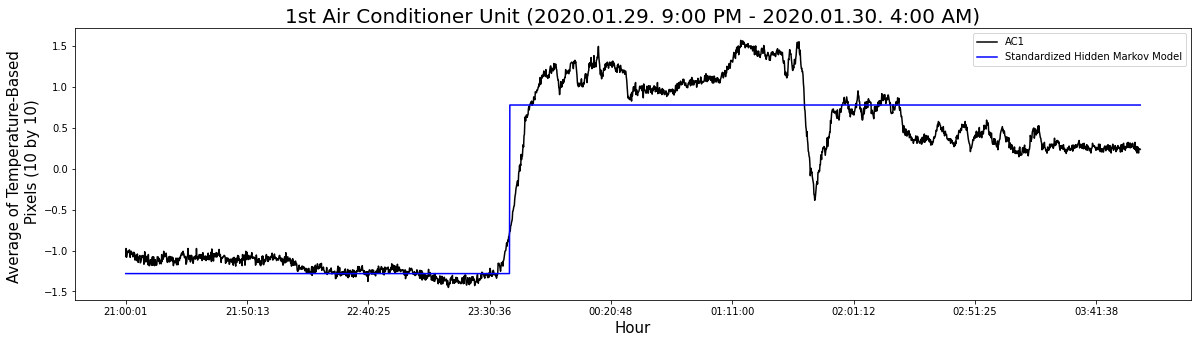

In [ ]:
#@ 2020 Jan 29

# -- set start and end time
st = "2020-01-29 21:00:00" #change
en = "2020-01-30 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.29. 9:00 PM - 2020.01.30. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

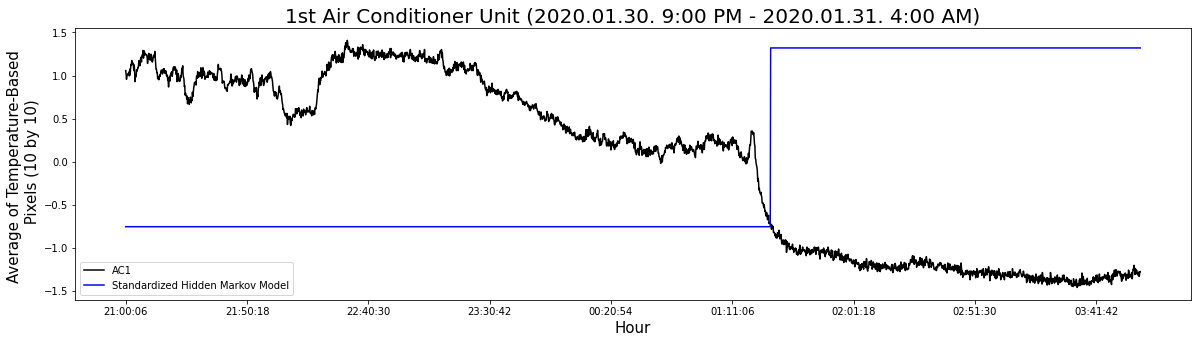

In [ ]:
#@ 2020 Jan 30

# -- set start and end time
st = "2020-01-30 21:00:00" #change
en = "2020-01-31 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.30. 9:00 PM - 2020.01.31. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

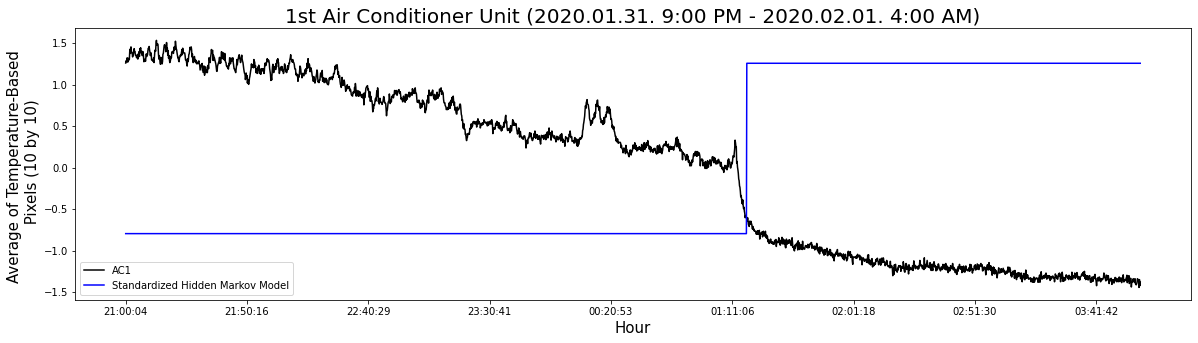

In [ ]:
#@ 2020 Jan 31

# -- set start and end time
st = "2020-01-31 21:00:00" #change
en = "2020-02-01 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.31. 9:00 PM - 2020.02.01. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

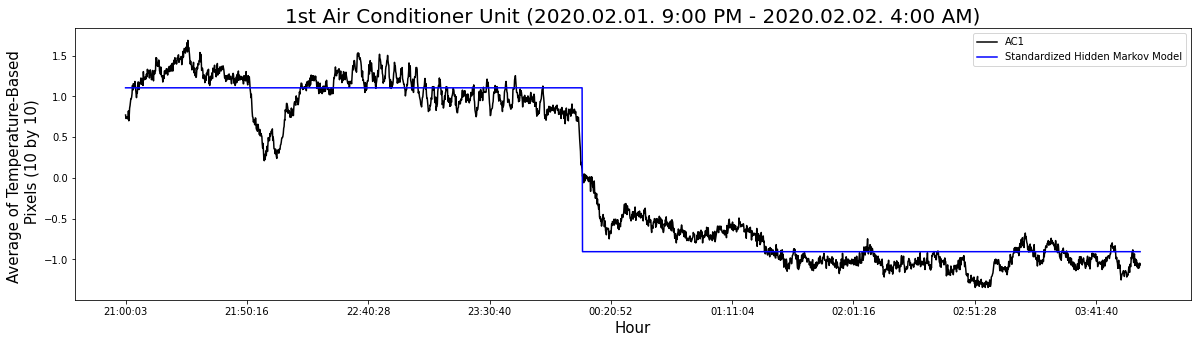

In [ ]:
#@ 2020 Feb 1

# -- set start and end time
st = "2020-02-01 21:00:00" #change
en = "2020-02-02 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.01. 9:00 PM - 2020.02.02. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

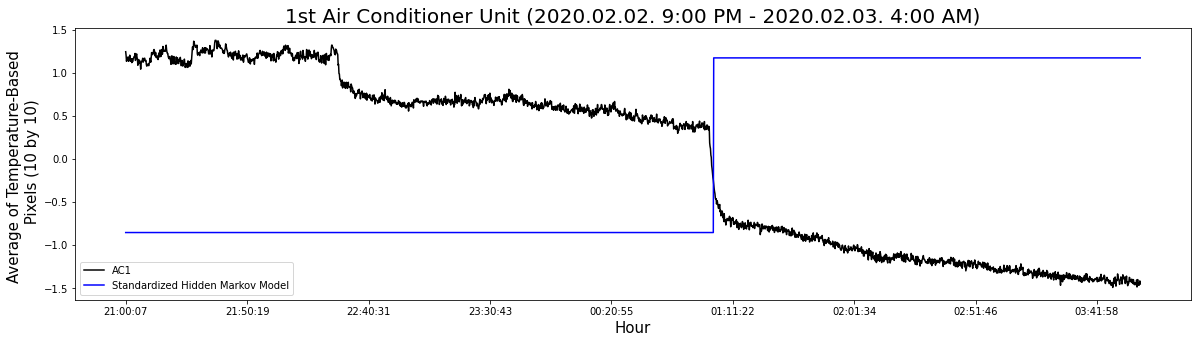

In [ ]:
#@ 2020 Feb 2

# -- set start and end time
st = "2020-02-02 21:00:00" #change
en = "2020-02-03 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.02. 9:00 PM - 2020.02.03. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

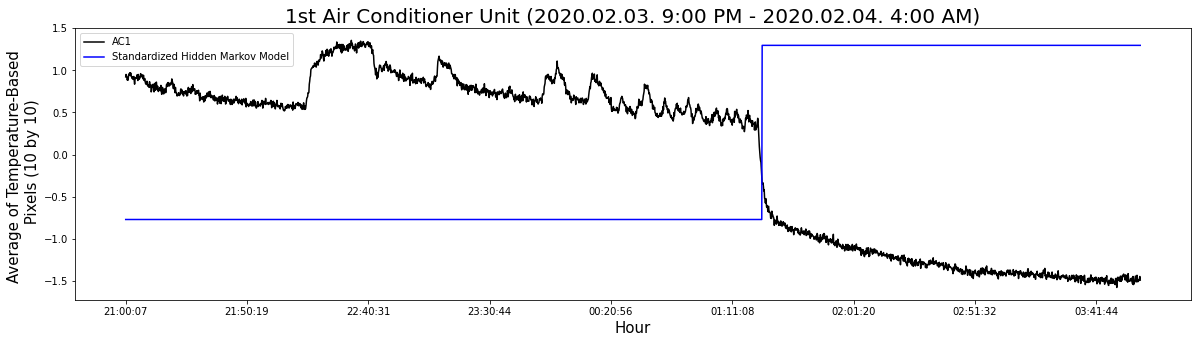

In [ ]:
#@ 2020 Feb 3

# -- set start and end time
st = "2020-02-03 21:00:00" #change
en = "2020-02-04 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.03. 9:00 PM - 2020.02.04. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

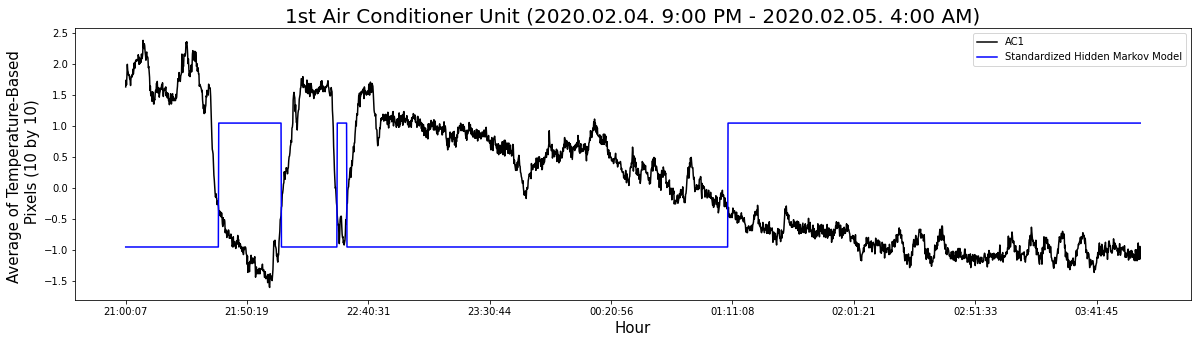

In [ ]:
#@ 2020 Feb 4

# -- set start and end time
st = "2020-02-04 21:00:00" #change
en = "2020-02-05 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.04. 9:00 PM - 2020.02.05. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

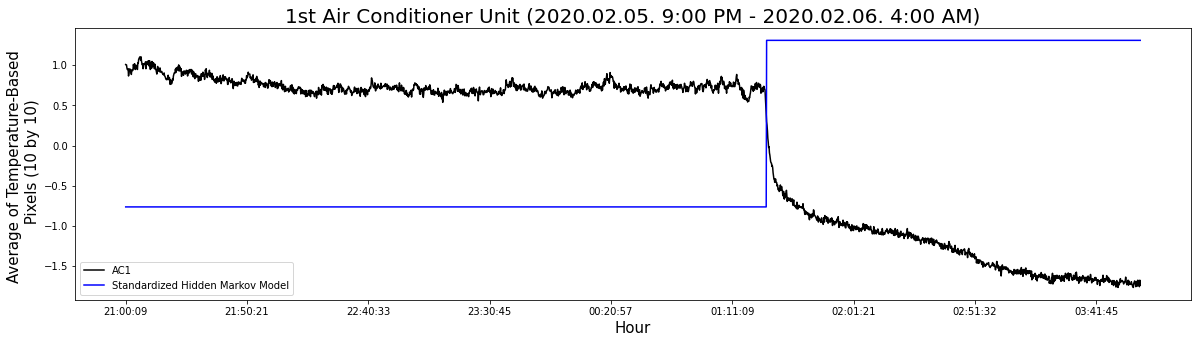

In [ ]:
#@ 2020 Feb 5

# -- set start and end time
st = "2020-02-05 21:00:00" #change
en = "2020-02-06 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.05. 9:00 PM - 2020.02.06. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

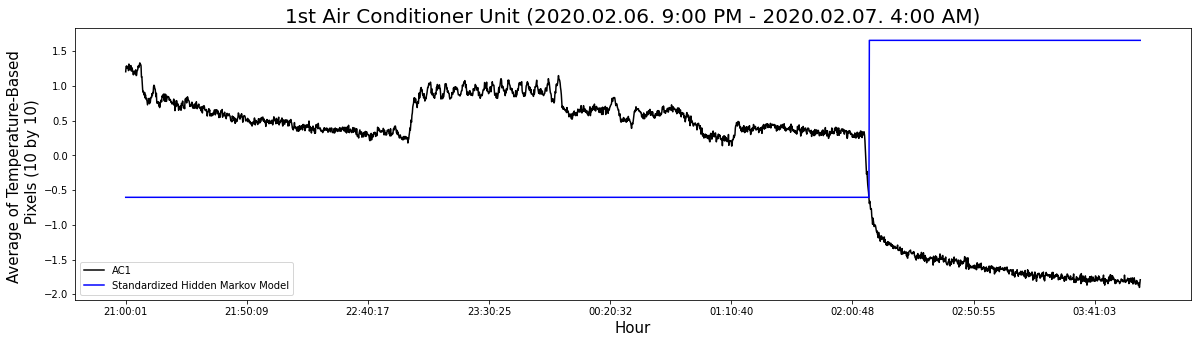

In [ ]:
#@ 2020 Feb 3

# -- set start and end time
st = "2020-02-06 21:00:00" #change
en = "2020-02-07 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.06. 9:00 PM - 2020.02.07. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

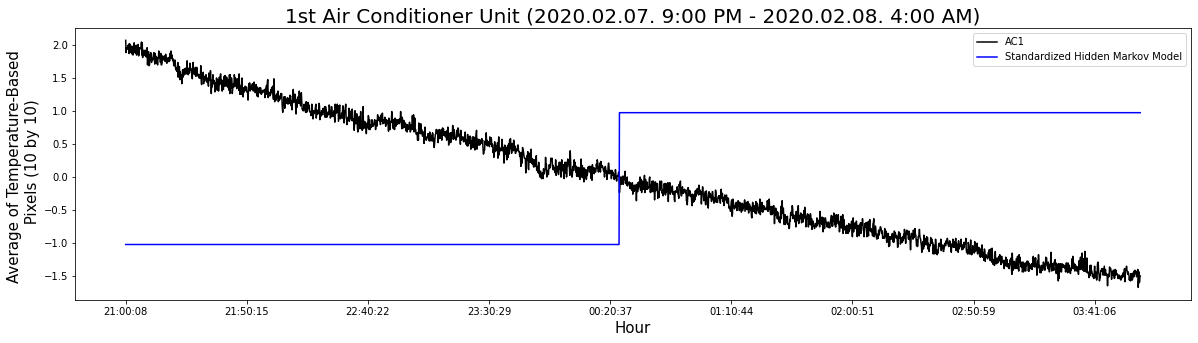

In [ ]:
#@ 2020 Feb 7

# -- set start and end time
st = "2020-02-07 21:00:00" #change
en = "2020-02-08 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.07. 9:00 PM - 2020.02.08. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

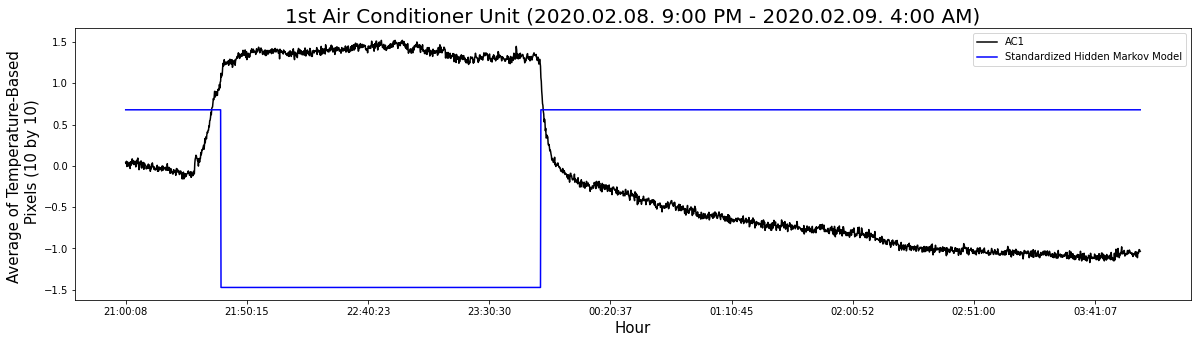

In [ ]:
#@ 2020 Feb 8

# -- set start and end time
st = "2020-02-08 21:00:00" #change
en = "2020-02-09 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.08. 9:00 PM - 2020.02.09. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

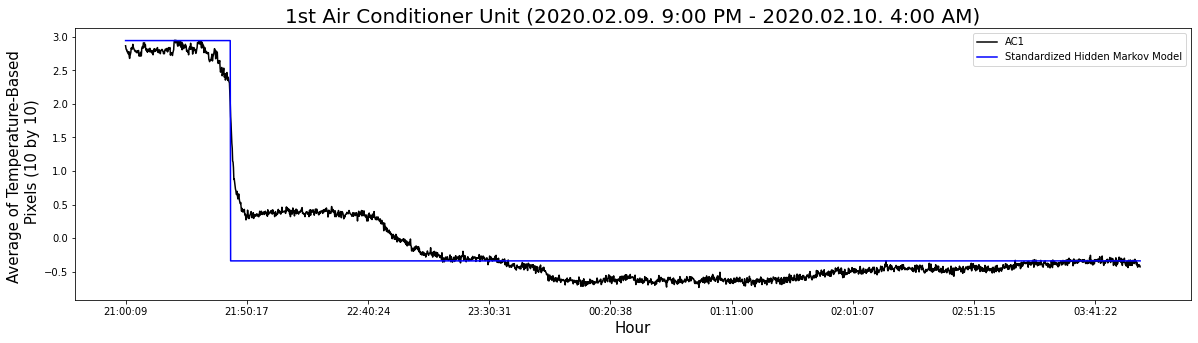

In [ ]:
#@ 2020 Feb 9

# -- set start and end time
st = "2020-02-09 21:00:00" #change
en = "2020-02-10 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.09. 9:00 PM - 2020.02.10. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

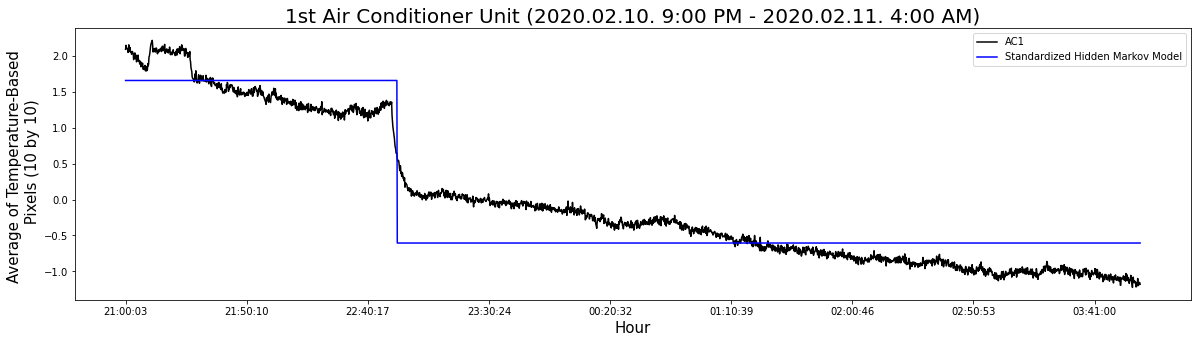

In [ ]:
#@ 2020 Feb 10

# -- set start and end time
st = "2020-02-10 21:00:00" #change
en = "2020-02-11 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.10. 9:00 PM - 2020.02.11. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

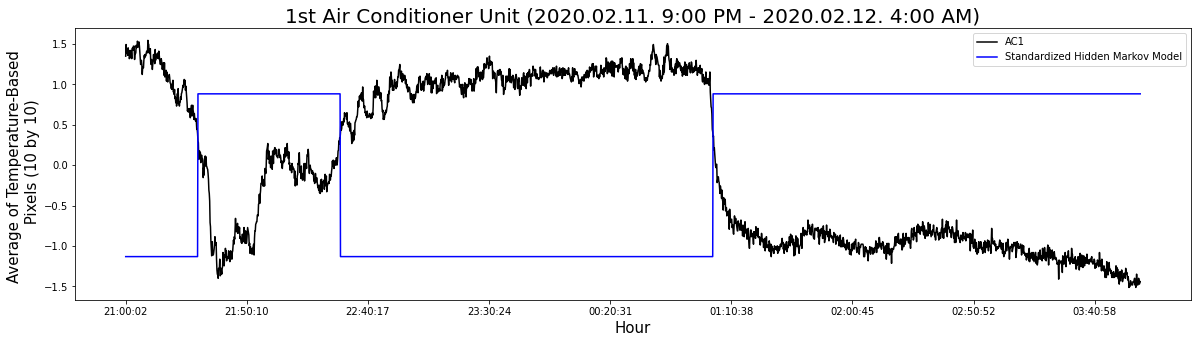

In [ ]:
#@ 2020 Feb 11

# -- set start and end time
st = "2020-02-11 21:00:00" #change
en = "2020-02-12 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.11. 9:00 PM - 2020.02.12. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

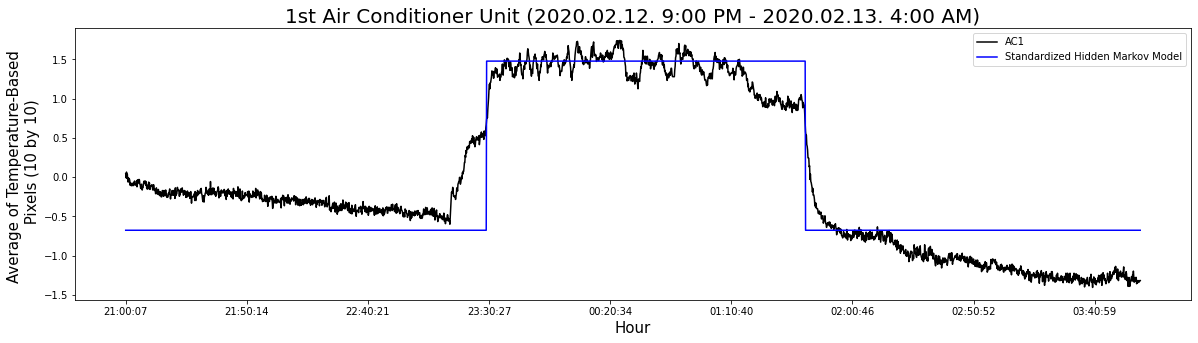

In [ ]:
#@ 2020 Feb 12

# -- set start and end time
st = "2020-02-12 21:00:00" #change
en = "2020-02-13 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.12. 9:00 PM - 2020.02.13. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

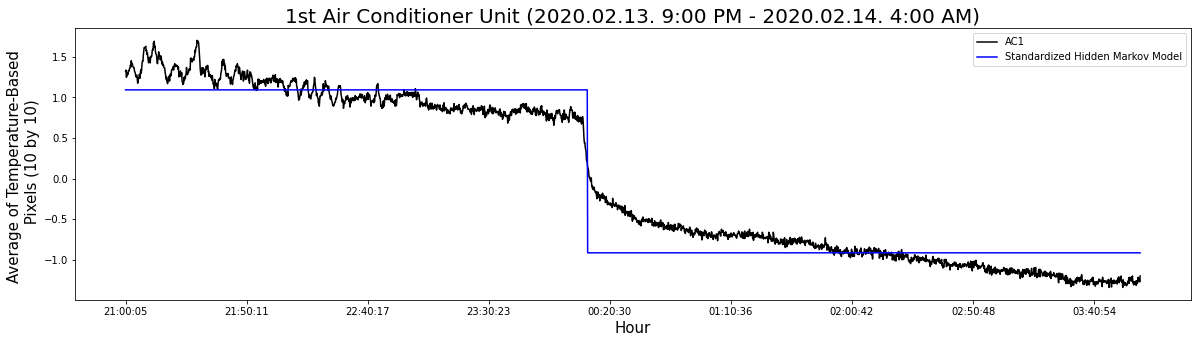

In [ ]:
#@ 2020 Feb 13

# -- set start and end time
st = "2020-02-13 21:00:00" #change
en = "2020-02-14 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.13. 9:00 PM - 2020.02.14. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

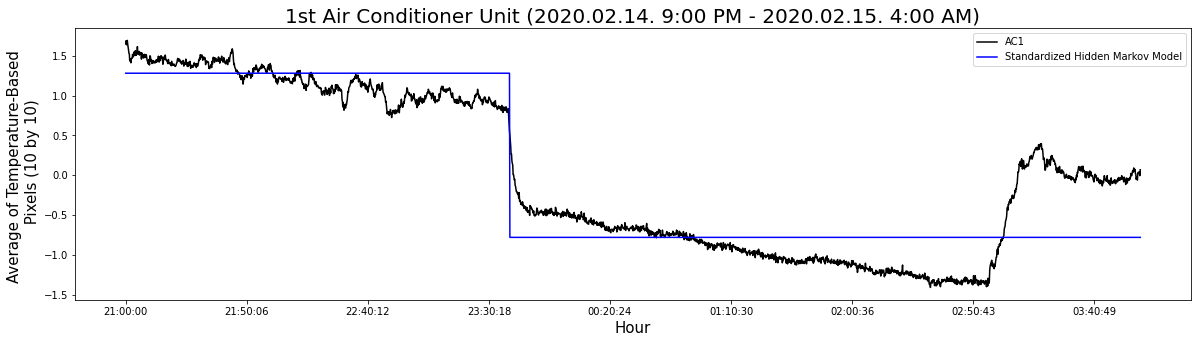

In [ ]:
#@ 2020 Feb 14

# -- set start and end time
st = "2020-02-14 21:00:00" #change
en = "2020-02-15 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.14. 9:00 PM - 2020.02.15. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

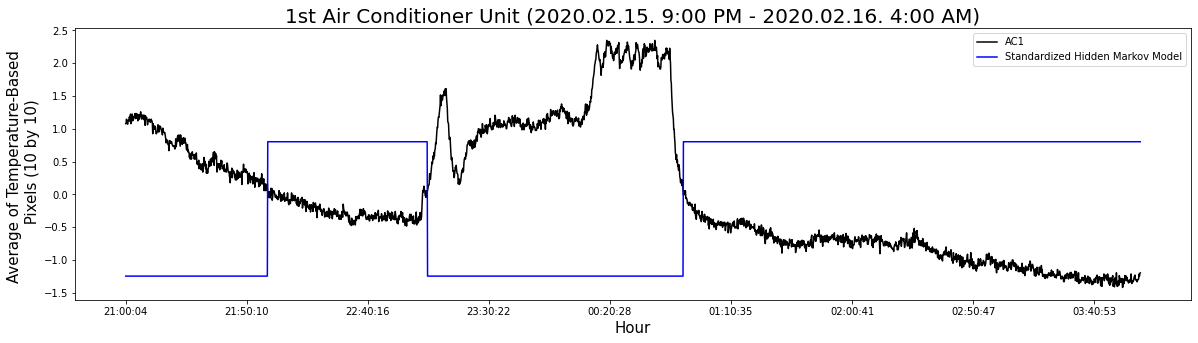

In [ ]:
#@ 2020 Feb 15

# -- set start and end time
st = "2020-02-15 21:00:00" #change
en = "2020-02-16 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.15. 9:00 PM - 2020.02.16. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

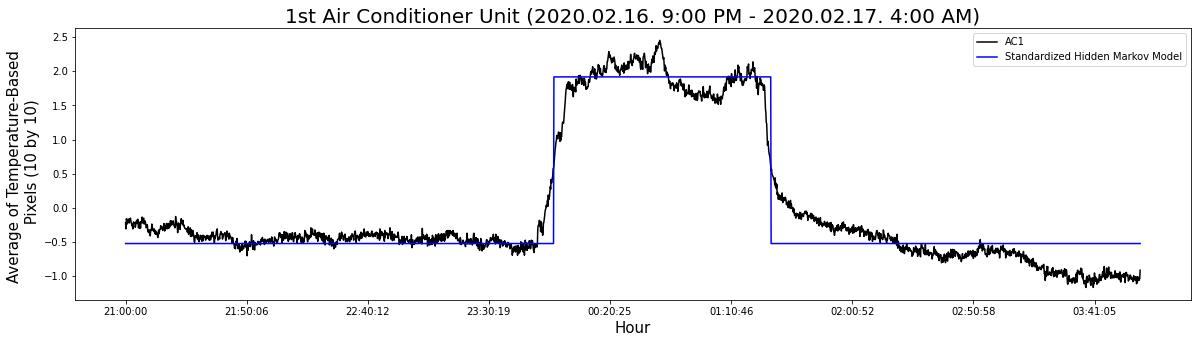

In [ ]:
#@ 2020 Feb 16

# -- set start and end time
st = "2020-02-16 21:00:00" #change
en = "2020-02-17 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.16. 9:00 PM - 2020.02.17. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

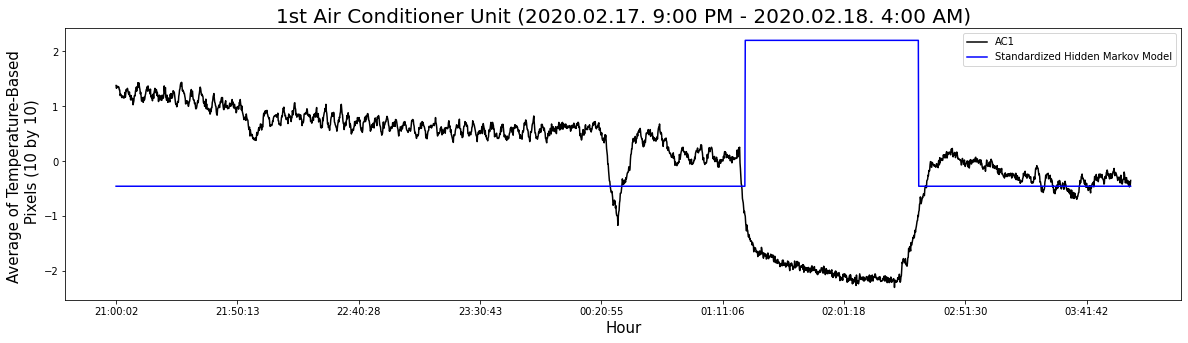

In [ ]:
#@ 2020 Feb 17

# -- set start and end time
st = "2020-02-17 21:00:00" #change
en = "2020-02-18 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.17. 9:00 PM - 2020.02.18. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

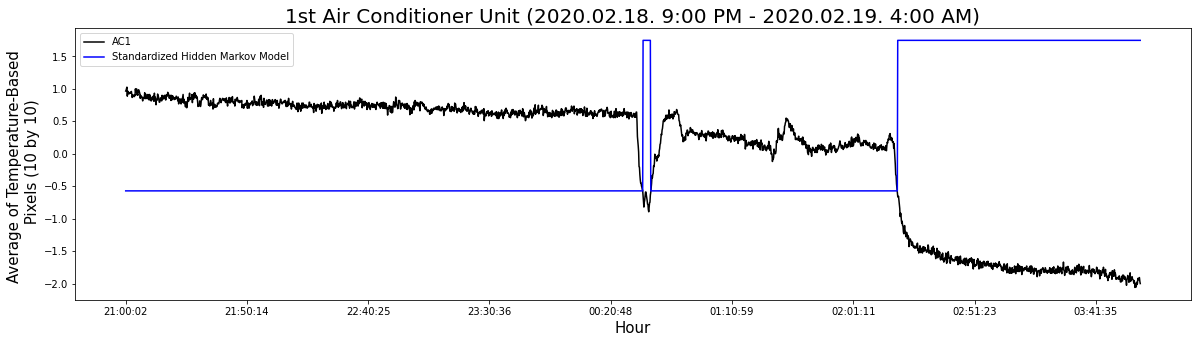

In [ ]:
#@ 2020 Feb 18

# -- set start and end time
st = "2020-02-18 21:00:00" #change
en = "2020-02-19 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.18. 9:00 PM - 2020.02.19. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

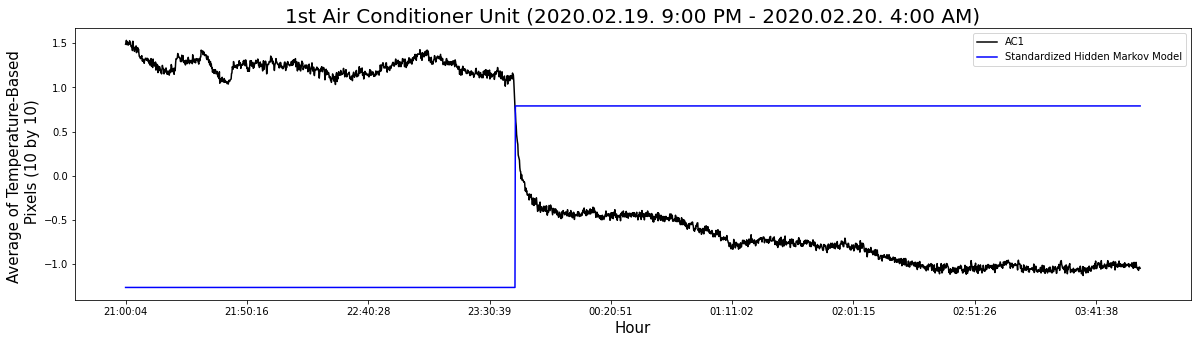

In [ ]:
#@ 2020 Feb 19

# -- set start and end time
st = "2020-02-19 21:00:00" #change
en = "2020-02-20 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.19. 9:00 PM - 2020.02.20. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

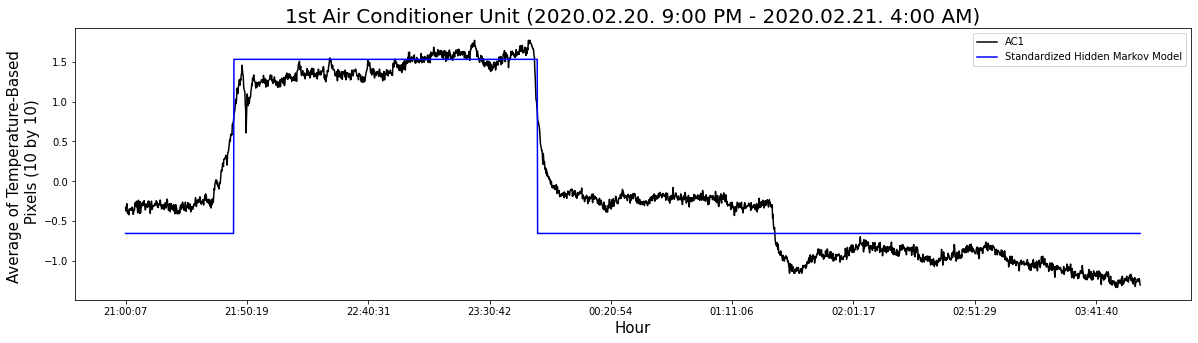

In [ ]:
#@ 2020 Feb 20

# -- set start and end time
st = "2020-02-20 21:00:00" #change
en = "2020-02-21 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.20. 9:00 PM - 2020.02.21. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

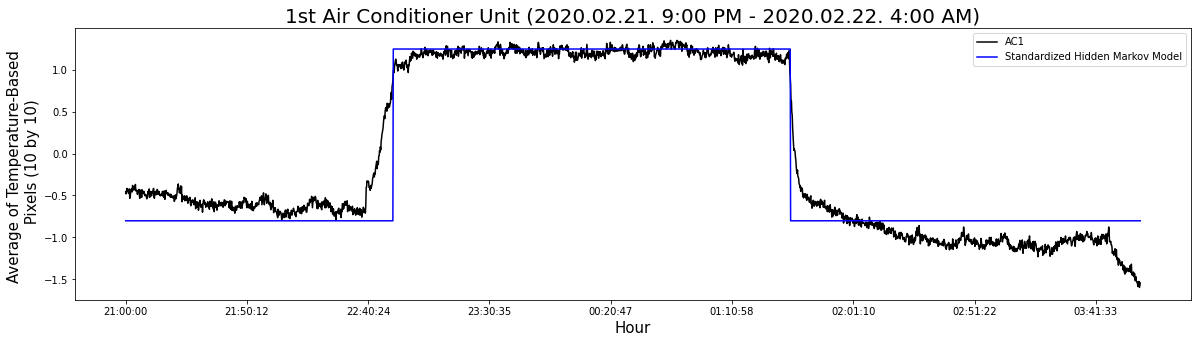

In [ ]:
#@ 2020 Feb 21

# -- set start and end time
st = "2020-02-21 21:00:00" #change
en = "2020-02-22 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.21. 9:00 PM - 2020.02.22. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

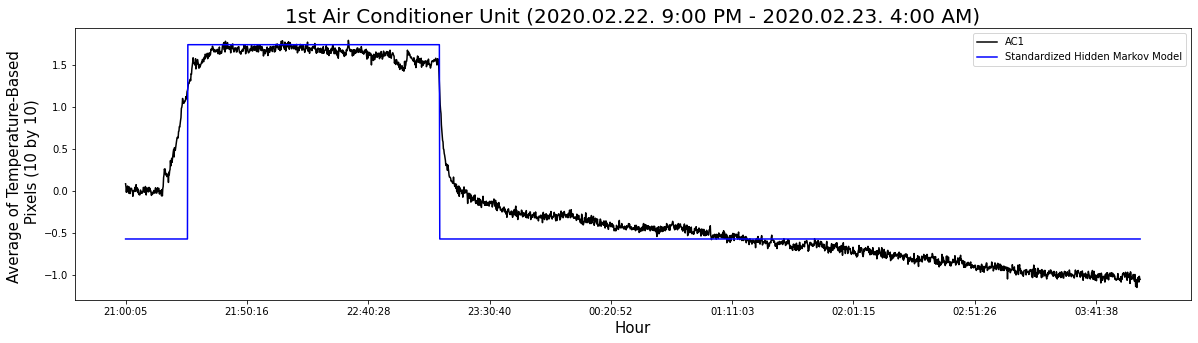

In [ ]:
#@ 2020 Feb 22

# -- set start and end time
st = "2020-02-22 21:00:00" #change
en = "2020-02-23 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.22. 9:00 PM - 2020.02.23. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

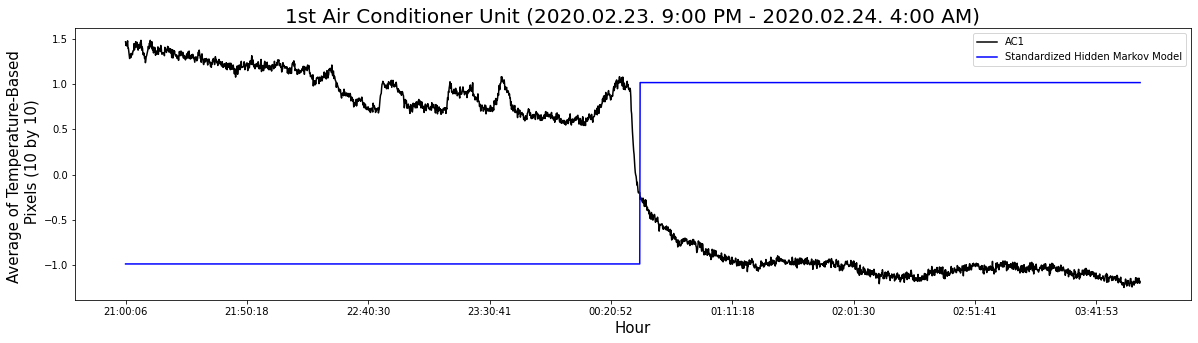

In [ ]:
#@ 2020 Feb 23

# -- set start and end time
st = "2020-02-23 21:00:00" #change
en = "2020-02-24 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.23. 9:00 PM - 2020.02.24. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

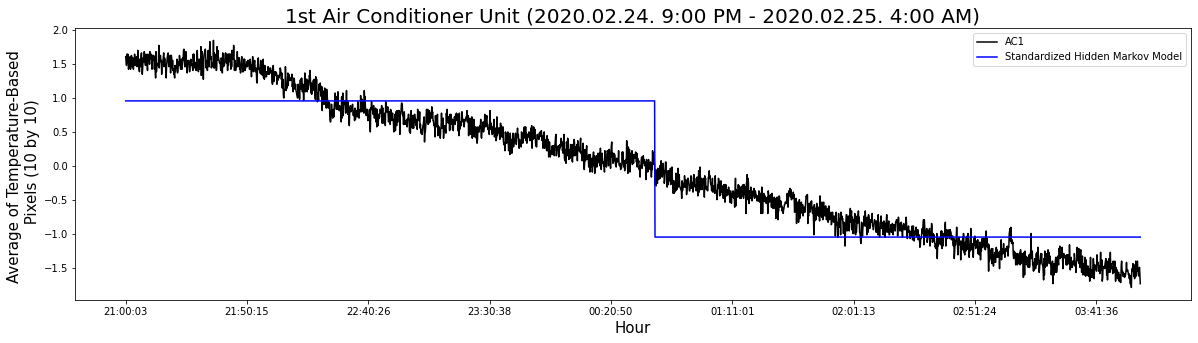

In [ ]:
#@ 2020 Feb 24

# -- set start and end time
st = "2020-02-24 21:00:00" #change
en = "2020-02-25 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.24. 9:00 PM - 2020.02.25. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

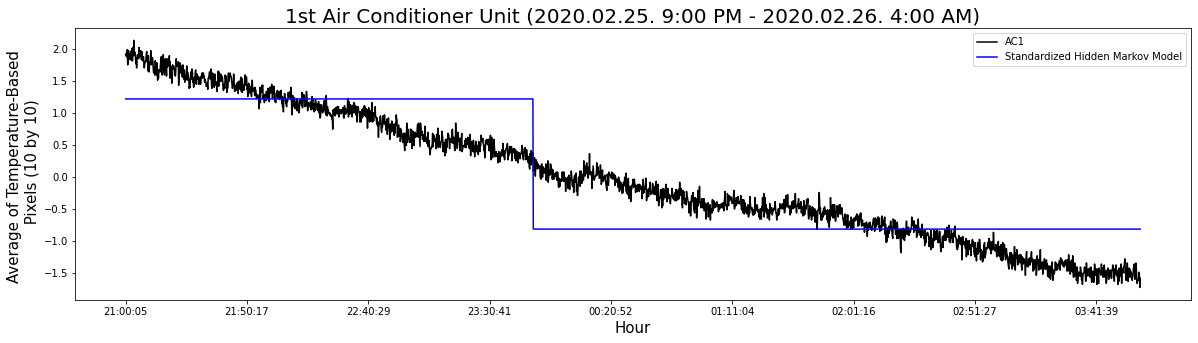

In [ ]:
#@ 2020 Feb 25

# -- set start and end time
st = "2020-02-25 21:00:00" #change
en = "2020-02-26 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.25. 9:00 PM - 2020.02.26. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

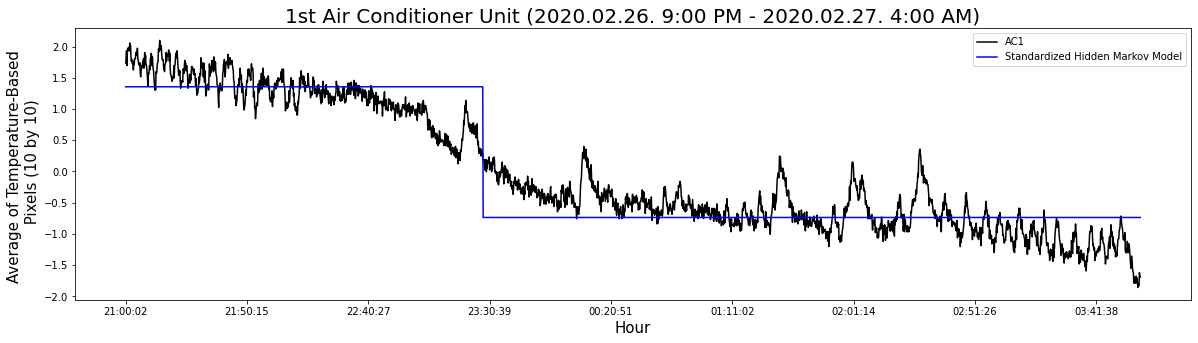

In [ ]:
#@ 2020 Feb 26

# -- set start and end time
st = "2020-02-26 21:00:00" #change
en = "2020-02-27 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.26. 9:00 PM - 2020.02.27. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

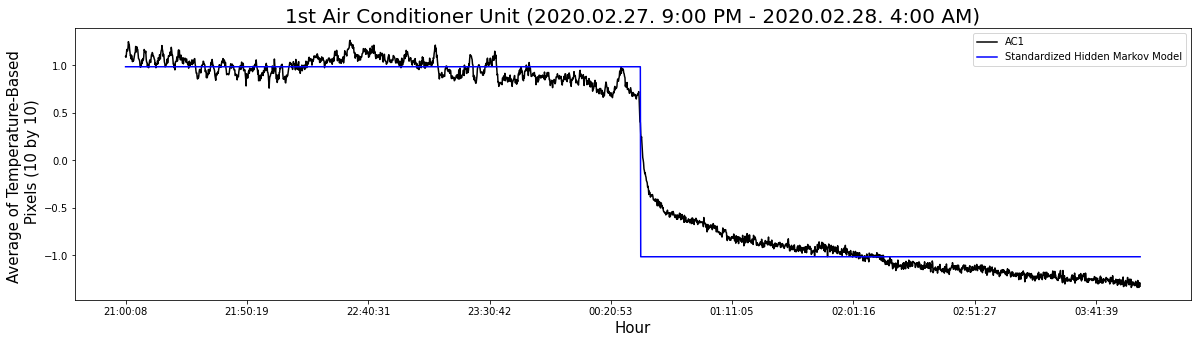

In [ ]:
#@ 2020 Feb 27

# -- set start and end time
st = "2020-02-27 21:00:00" #change
en = "2020-02-28 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.27. 9:00 PM - 2020.02.28. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

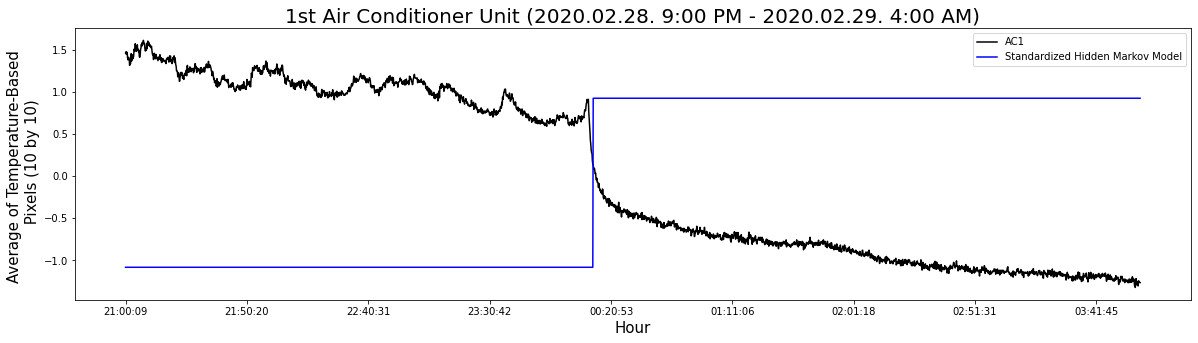

In [ ]:
#@ 2020 Feb 28

# -- set start and end time
st = "2020-02-28 21:00:00" #change
en = "2020-02-29 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.28. 9:00 PM - 2020.02.29. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

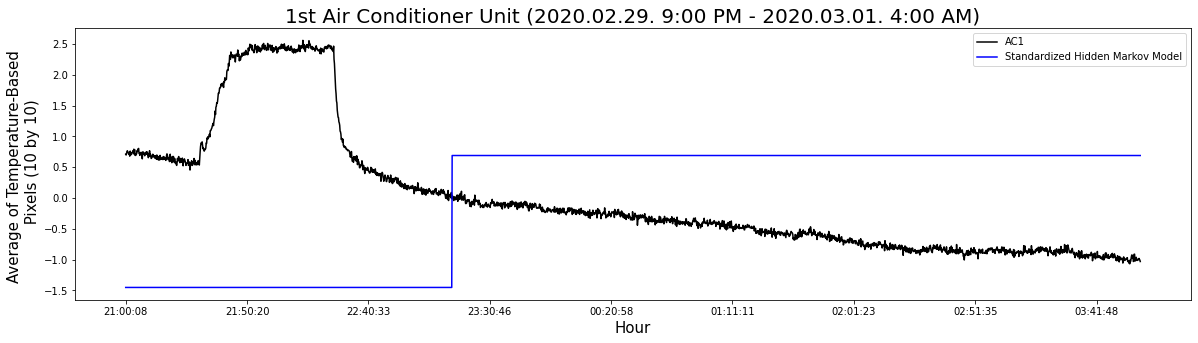

In [ ]:
#@ 2020 Feb 29

# -- set start and end time
st = "2020-02-29 21:00:00" #change
en = "2020-03-01 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.02.29. 9:00 PM - 2020.03.01. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

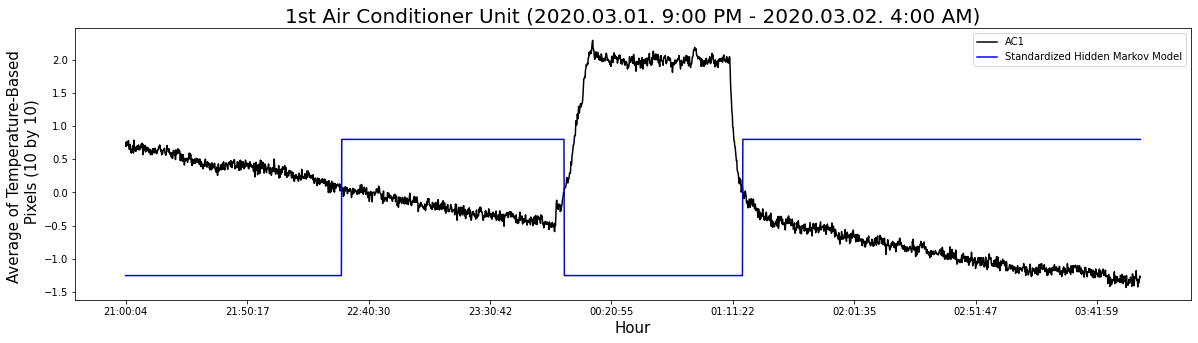

In [ ]:
#@ 2020 Mar 1

# -- set start and end time
st = "2020-03-01 21:00:00" #change
en = "2020-03-02 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.01. 9:00 PM - 2020.03.02. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

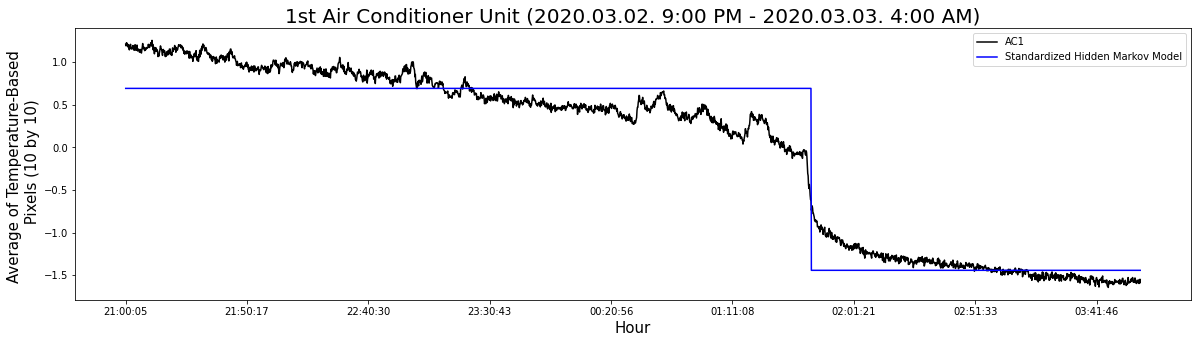

In [ ]:
#@ 2020 Mar 2

# -- set start and end time
st = "2020-03-02 21:00:00" #change
en = "2020-03-03 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.02. 9:00 PM - 2020.03.03. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

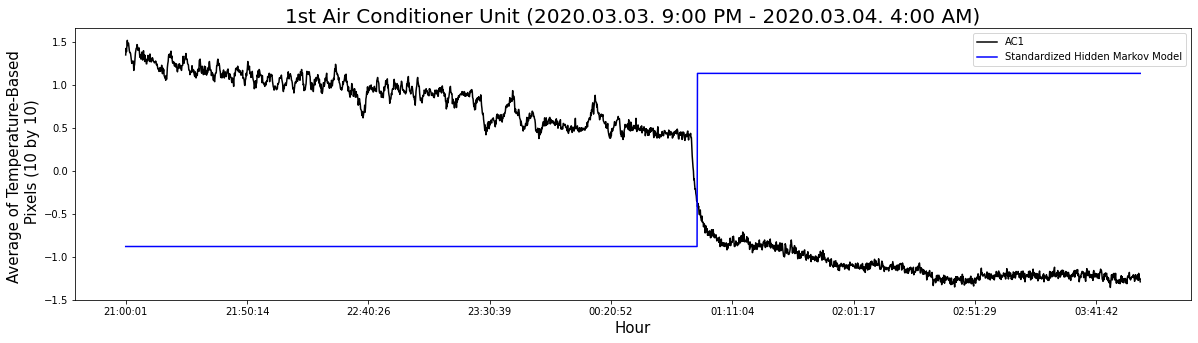

In [ ]:
#@ 2020 Mar 3

# -- set start and end time
st = "2020-03-03 21:00:00" #change
en = "2020-03-04 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.03. 9:00 PM - 2020.03.04. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

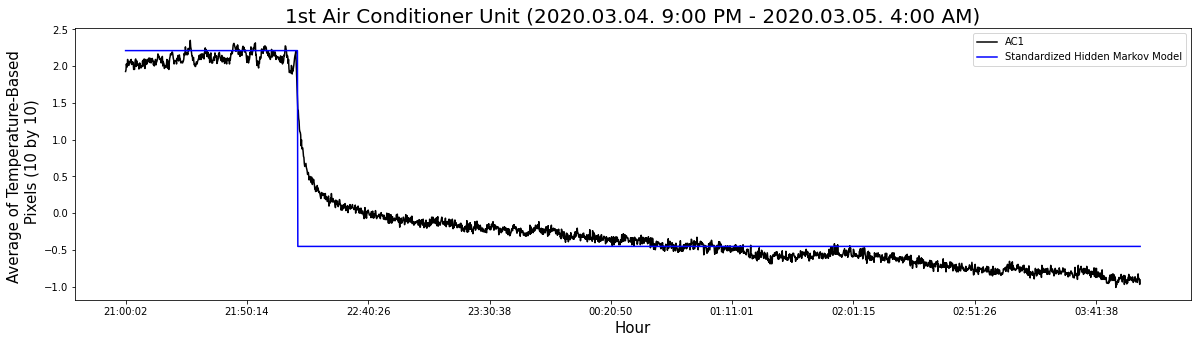

In [ ]:
#@ 2020 Mar 4

# -- set start and end time
st = "2020-03-04 21:00:00" #change
en = "2020-03-05 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.04. 9:00 PM - 2020.03.05. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

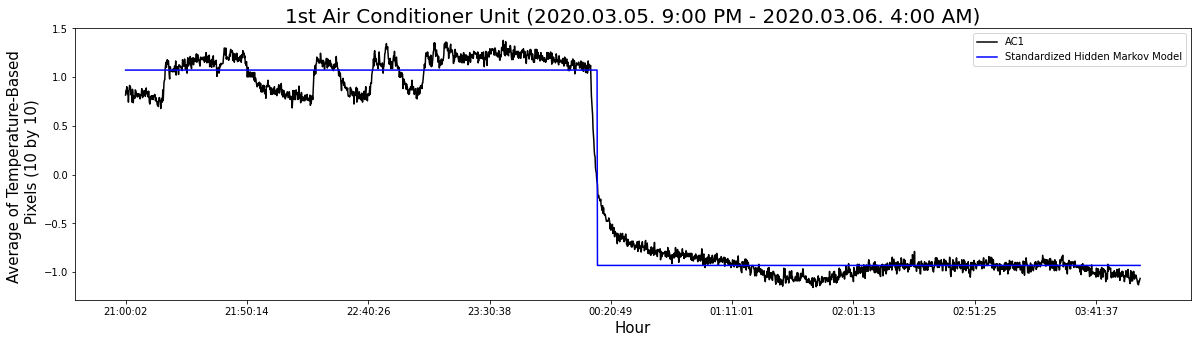

In [ ]:
#@ 2020 Mar 5

# -- set start and end time
st = "2020-03-05 21:00:00" #change
en = "2020-03-06 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.05. 9:00 PM - 2020.03.06. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

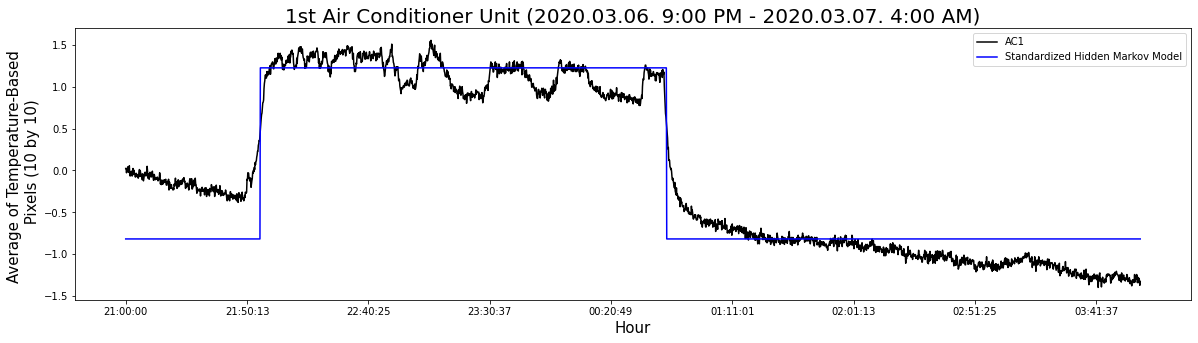

In [ ]:
#@ 2020 Mar 6

# -- set start and end time
st = "2020-03-06 21:00:00" #change
en = "2020-03-07 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.06. 9:00 PM - 2020.03.07. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

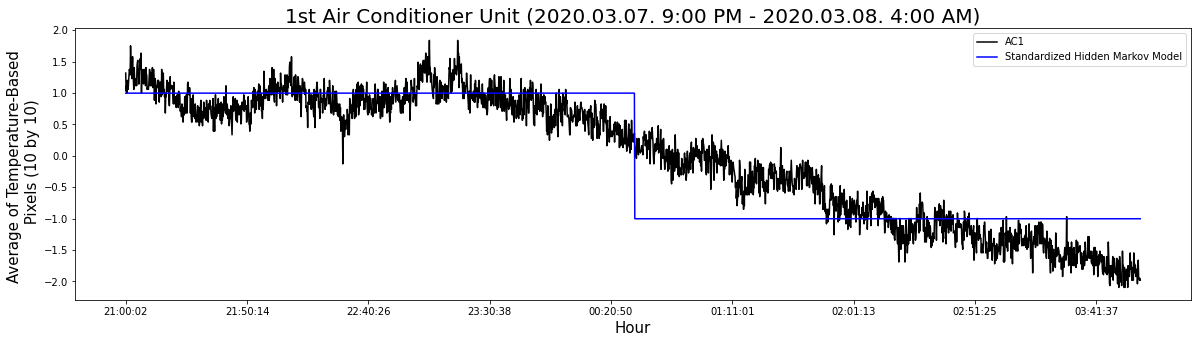

In [ ]:
#@ 2020 Mar 7

# -- set start and end time
st = "2020-03-07 21:00:00" #change
en = "2020-03-08 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.07. 9:00 PM - 2020.03.08. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

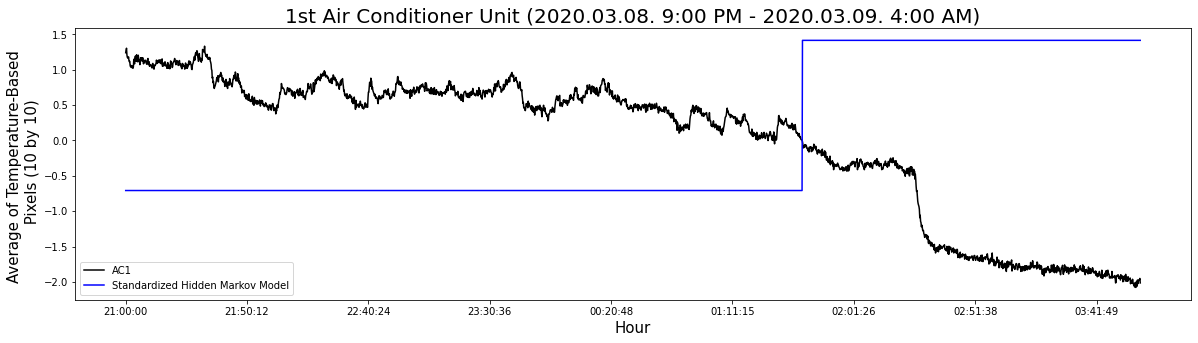

In [ ]:
#@ 2020 Mar 8

# -- set start and end time
st = "2020-03-08 21:00:00" #change
en = "2020-03-09 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.08. 9:00 PM - 2020.03.09. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

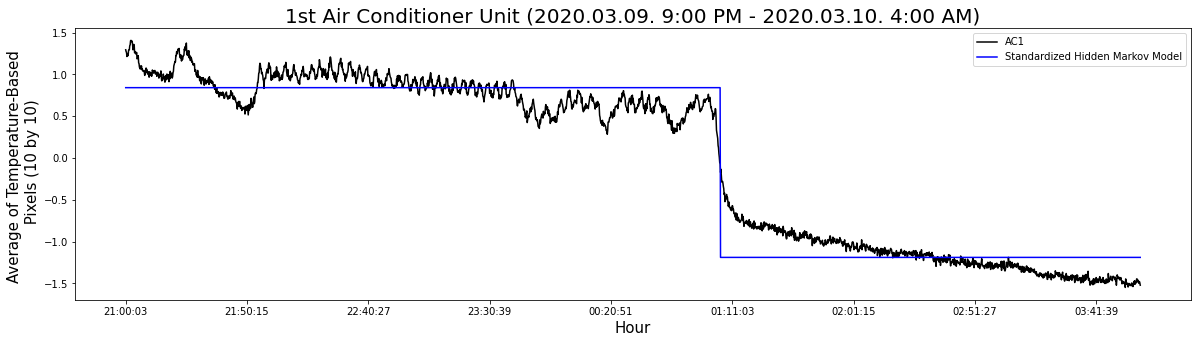

In [ ]:
#@ 2020 Mar 9

# -- set start and end time
st = "2020-03-09 21:00:00" #change
en = "2020-03-10 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.09. 9:00 PM - 2020.03.10. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

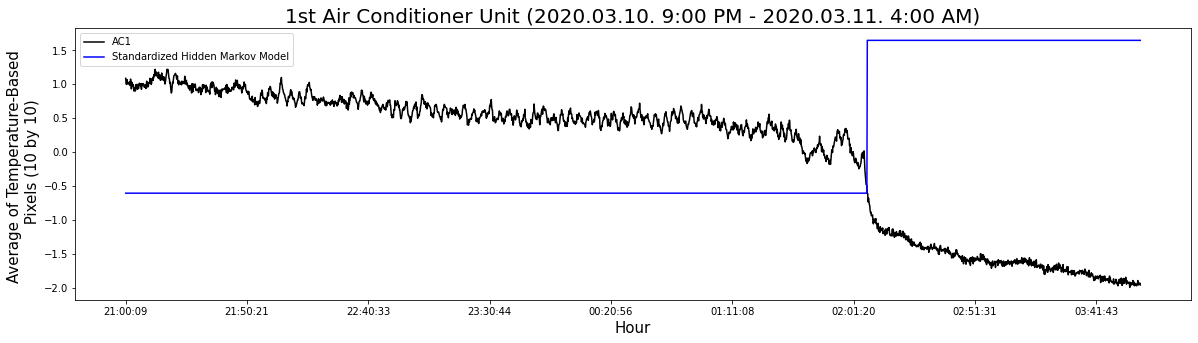

In [ ]:
#@ 2020 Mar 10

# -- set start and end time
st = "2020-03-10 21:00:00" #change
en = "2020-03-11 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.10. 9:00 PM - 2020.03.11. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

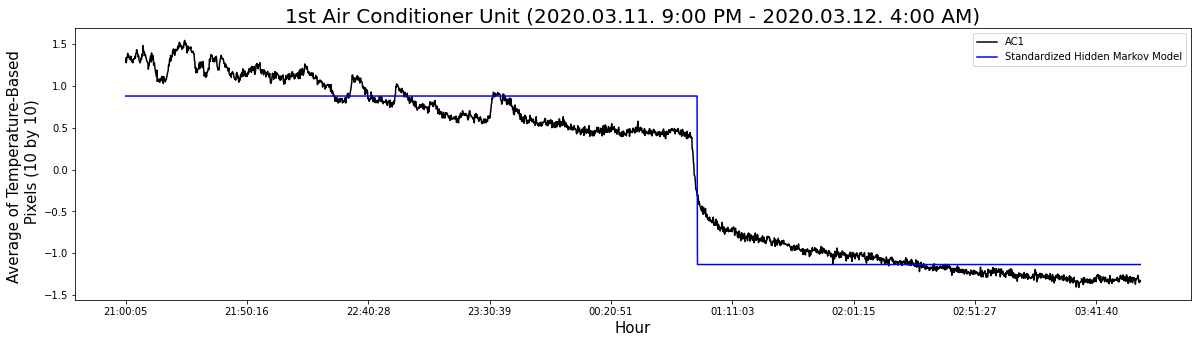

In [ ]:
#@ 2020 Mar 11

# -- set start and end time
st = "2020-03-11 21:00:00" #change
en = "2020-03-12 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.11. 9:00 PM - 2020.03.12. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

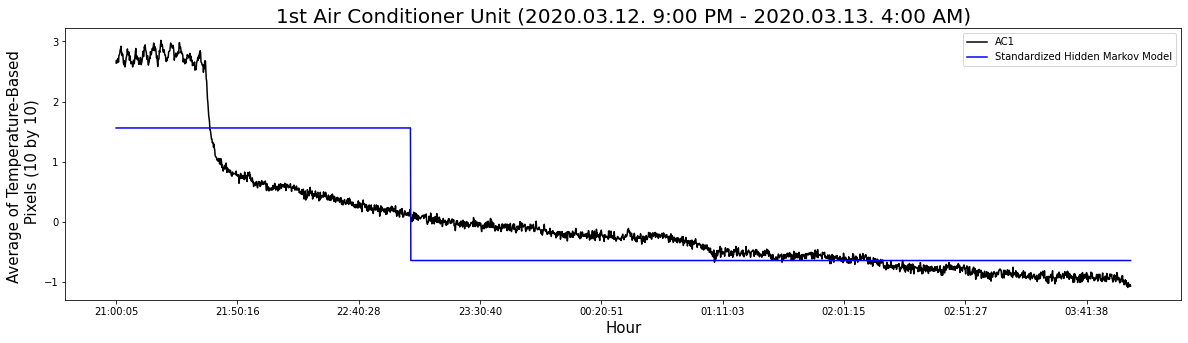

In [ ]:
#@ 2020 Mar 12

# -- set start and end time
st = "2020-03-12 21:00:00" #change
en = "2020-03-13 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.12. 9:00 PM - 2020.03.13. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

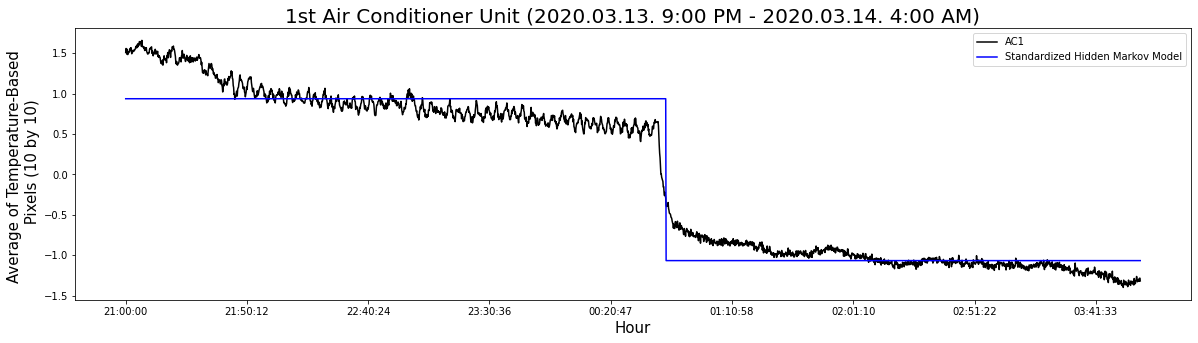

In [ ]:
#@ 2020 Mar 13

# -- set start and end time
st = "2020-03-13 21:00:00" #change
en = "2020-03-14 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.13. 9:00 PM - 2020.03.14. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

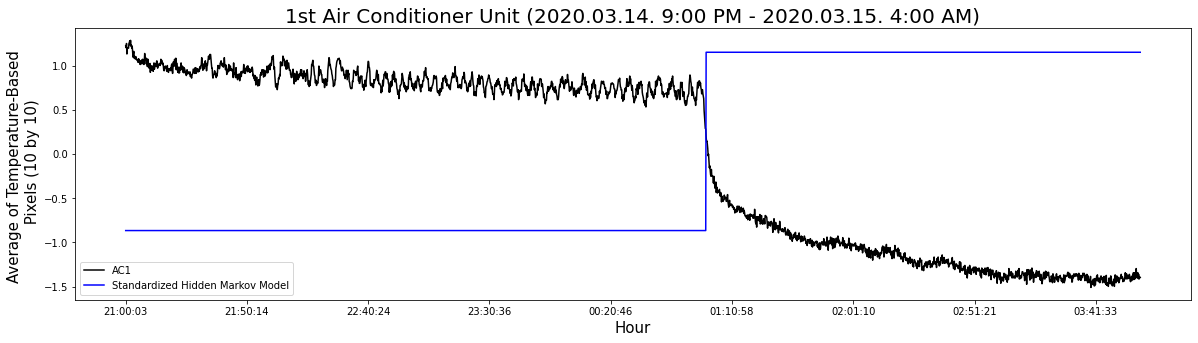

In [ ]:
#@ 2020 Mar 14

# -- set start and end time
st = "2020-03-14 21:00:00" #change
en = "2020-03-15 04:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.14. 9:00 PM - 2020.03.15. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

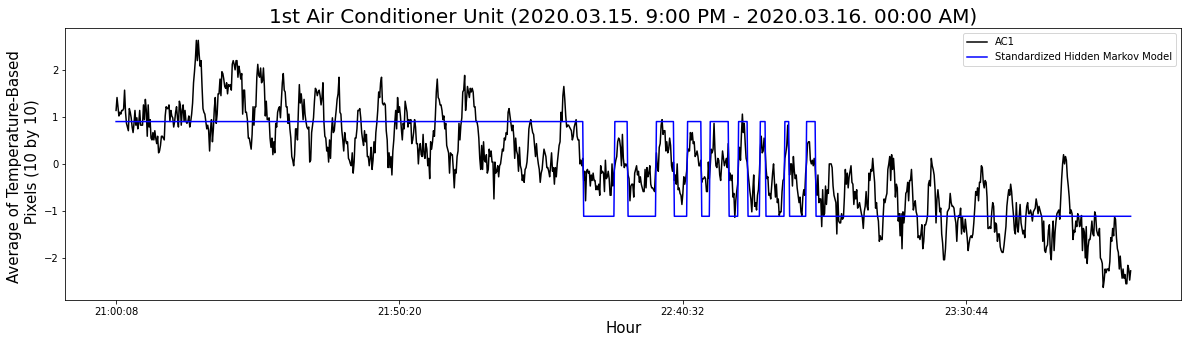

In [ ]:
#@ 2020 Mar 15

# -- set start and end time
st = "2020-03-15 21:00:00" #change
en = "2020-03-16 00:00:00" #change

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.timestamp[i] = fpaths_sub.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.03.15. 9:00 PM - 2020.03.16. 00:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")